In [333]:
import os
import input.input_output
import input.initialize

import imp
imp.reload(input.input_output)
imp.reload(input.initialize)


<module 'input.initialize' from '/Users/shiraz/Projects/sensor-network-sim/input/initialize.py'>

In [334]:
# Write thread here
simulation_file = os.path.join("input","json_files", "simulation",  "ICF-sim.json")
sensor_network_file = os.path.join("input","json_files", "sensor_network",  "ICF-sensor-network.json")

# Take simulation data
raw_data = input.input_output.read_configs([simulation_file, sensor_network_file])
input_data  = input.initialize.do_everything(raw_data)

In [335]:
# Test data here
input_data

{'scheme': 'KCF-BWG',
 'network': {'adjacency': [[1, 0, 1, 1, 0],
   [0, 1, 1, 0, 1],
   [1, 1, 1, 1, 1],
   [1, 0, 1, 1, 0],
   [0, 1, 1, 0, 1]],
  'n_sensors': 5,
  'observability': [[[1, 0], [0, 1]],
   [[1, 0], [0, 1]],
   [[1, 0], [0, 1]],
   [[0.5, 0], [0, 1.1]],
   [[1, 0], [0, 1]]],
  'noise': [[[1, 0], [0, 1]],
   [[1, 0], [0, 1]],
   [[1, 0], [0, 1]],
   [[4, 0], [0, 4]],
   [[1, 0], [0, 1]]]},
 'simulation': {'total_steps': 1000},
 'target': {'constraints': {'x_initial': [20, 0]},
  'state': {'ss_A': array([[ 0.99987663, -0.01570732],
          [ 0.01570732,  0.99987663]]), 'ss_B': array([[1, 0],
          [0, 1]]), 'dimension': 2},
  'noise': [[1, 0], [0, 1]]}}

In [358]:
# Simulation
# history = {
#     "x" : [],
#     "xhat" : [],
#     "xbar" : []
# } ~ move to class
data["target"]["noise"]


[[1, 0], [0, 1]]

In [402]:
import numpy as np
from scipy import stats as sps

def column(vector):
    return vector.reshape(len(vector), 1)

class Noise:
    def __init__(self, _cov):
        self.r_var = sps.multivariate_normal(mean=None, cov=_cov)
        self.dim =len(_cov)
        
    def __call__(self):
        return self.r_var.rvs().reshape(self.dim, 1)
        
    def update_cov(self, _cov):
        if len(_cov) == self.dim:
            self.r_var.cov = _cov
        else:
            raise ValueError("Invalid co-variance")
    
class Target:
    def __init__(self, target_data):
        self.A = np.array(target_data["state"]["ss_A"])
        self.B = np.array(target_data["state"]["ss_B"])
        self.Q = np.array(target_data["noise"])
        self.x = np.array(target_data["constraints"]["x_initial"])
        self.x = column(self.x)
        self.w = Noise(self.Q)
    
    def update(self):
        self.x = (self.A @ self.x) +(self.B @ self.w())
        
target = Target(data["target"])

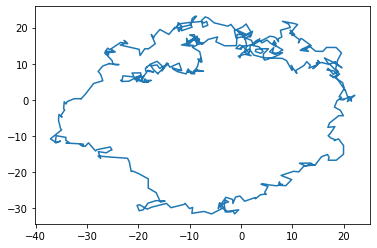

In [403]:
import matplotlib.pyplot as plt
xhis = [[],[]]
for t in range(500):
    xhis[0].append(target.x[0])
    xhis[1].append(target.x[1])
    target.update()
plt.plot(xhis[0],xhis[1])